In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
# Set the input directory
flower_dataset_directory = "./data/Flowers/"
flower_category_foldername = os.listdir(flower_dataset_directory)

# Set the output directory
output_dir = './data/downscaled_images/'

# # Iterate over the images
for folder in flower_category_foldername:
    image_filenames = os.listdir(flower_dataset_directory+folder)
    for filename in image_filenames:
        # Load the image
        image = cv2.imread(flower_dataset_directory + folder + "/" + filename)

        # Downscale the image using linear interpolation
        downscaled_image = cv2.resize(
            image, (224, 224), interpolation=cv2.INTER_LINEAR)

        # Save the downscaled image to a file
        folder_name = folder.replace(" ", "_")  # remove spaces from folder name
        output_filename = os.path.join(output_dir, folder_name, "Images", filename)
        os.makedirs(os.path.dirname(output_filename), exist_ok=True)  # create the subdirectories
        cv2.imwrite(output_filename, downscaled_image)

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# index_group_name values
train_data_groups = ["Babi", "Calimerio", "Chrysanthemum", "Hydrangeas", "Lisianthus", "Pingpong", "Rosy", "Tana"]

epochs = 50
batch_size = 1


def extract_features(group, model, model_name):
    # empty array to store article_id
    article_ids = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    
    # image subfolers path
    dir_path = "./data/downscaled_images/"+group+'/'
    # image data augmentation
    generator = datagen.flow_from_directory(
        dir_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    
    # add files names as article_id array
    for i in generator.filenames:
        article_ids.append(i[(i.find("/")+1):i.find(".")])
    extracted_features = model.predict(
        generator, len(generator.filenames) // batch_size)
    
    extracted_features = extracted_features.reshape(
        (len(generator.filenames), -1))
    
    
    # save extracted features
    np.save(open('./ResNet_{group}_{model_name}_features.npy'.format(
        group=group, model_name=model_name), 'wb'), extracted_features)
    np.save(open('./ResNet_{group}_{model_name}_feature_flower_ids.npy'.format(
        group=group, model_name=model_name), 'wb'),
            np.array(article_ids))

In [4]:
from keras import applications

resnet_model = applications.ResNet50(
        include_top=False, weights='imagenet')
  
for image_group in train_data_groups:
    extract_features(image_group,resnet_model, "ResNet50" )

Found 931 images belonging to 1 classes.
931/931 [==============================] - 88s 93ms/step
Found 353 images belonging to 1 classes.
353/353 [==============================] - 31s 89ms/step
Found 696 images belonging to 1 classes.
696/696 [==============================] - 64s 92ms/step
Found 518 images belonging to 1 classes.
518/518 [==============================] - 52s 100ms/step
Found 969 images belonging to 1 classes.
969/969 [==============================] - 94s 97ms/step
Found 360 images belonging to 1 classes.
360/360 [==============================] - 35s 97ms/step
Found 171 images belonging to 1 classes.
171/171 [==============================] - 16s 95ms/step
Found 623 images belonging to 1 classes.
623/623 [==============================] - 59s 94ms/step


In [6]:
# ResNet50 generated features
babi_extracted_features = np.load('ResNet_Babi_ResNet50_features.npy')
babi_Productids = np.load('ResNet_Babi_ResNet50_feature_flower_ids.npy')
calimerio_extracted_features = np.load(
    './ResNet_Calimerio_ResNet50_features.npy')
calimerio_Productids = np.load('./ResNet_Calimerio_ResNet50_feature_flower_ids.npy')
chrysanthemum_extracted_features = np.load(
    './ResNet_Chrysanthemum_ResNet50_features.npy')
chrysanthemum_Productids = np.load(
    './ResNet_Chrysanthemum_ResNet50_feature_flower_ids.npy')
hydrangeas_extracted_features = np.load(
    './ResNet_Hydrangeas_ResNet50_features.npy')
hydrangeas_Productids = np.load(
    './ResNet_Hydrangeas_ResNet50_feature_flower_ids.npy')
lisianthus_extracted_features = np.load('./ResNet_Lisianthus_ResNet50_features.npy')
lisianthus_Productids = np.load(
    './ResNet_Lisianthus_ResNet50_feature_flower_ids.npy')
pingpong_extracted_features = np.load('./ResNet_Pingpong_ResNet50_features.npy')
pingpong_Productids = np.load(
    './ResNet_Pingpong_ResNet50_feature_flower_ids.npy')
rosy_extracted_features = np.load('./ResNet_Rosy_ResNet50_features.npy')
rosy_Productids = np.load(
    './ResNet_Rosy_ResNet50_feature_flower_ids.npy')
tana_extracted_features = np.load('./ResNet_Tana_ResNet50_features.npy')
tana_Productids = np.load(
    './ResNet_Tana_ResNet50_feature_flower_ids.npy')


# VGG16_children_extracted_features = np.load('ResNet_Children_VGG16_features.npy')
# VGG16_children_Productids = np.load('ResNet_Children_VGG16_feature_product_ids.npy')
# VGG16_divided_extracted_features = np.load(
#     './ResNet_Divided_VGG16_features.npy')
# VGG16_divided_Productids = np.load('./ResNet_Divided_VGG16_feature_product_ids.npy')
# VGG16_menswear_extracted_features = np.load(
#     './ResNet_Menswear_VGG16_features.npy')
# VGG16_menswear_Productids = np.load(
#     './ResNet_Menswear_VGG16_feature_product_ids.npy')
# VGG16_ladieswear_extracted_features = np.load(
#     './ResNet_Ladieswear_VGG16_features.npy')
# VGG16_ladieswear_Productids = np.load(
#     './ResNet_Ladieswear_VGG16_feature_product_ids.npy')
# VGG16_sport_extracted_features = np.load('./ResNet_Sport_VGG16_features.npy')
# VGG16_sport_Productids = np.load(
#     './ResNet_Sport_VGG16_feature_product_ids.npy')

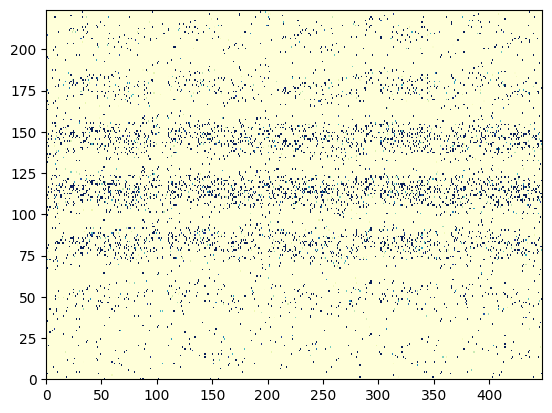

In [7]:
fig, ax = plt.subplots()
ax.pcolormesh(babi_extracted_features[0].reshape(224, 448),  vmax=.3,  cmap="YlGnBu")

plt.show()

In [ ]:
# display a single image
def display_image(path):
    img = Image.open(path)
    display(img)